In [1]:
#Question 4c
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#the values were put according to hwat i found earlier (the differentiation)
def f(x):
    x = np.asarray(x)
    if x < 1:
        return 25*x**2
    elif x <= 2:
        return x**2 + 48*x - 24
    else:
        return 25*x**2 - 48*x + 72

def df(x):
    if x < 1:
        return 50*x
    elif x <= 2:
        return 2*x + 48
    else:
        return 50*x - 48


In [3]:
#gradient descent
def gradient_descent(x0, alpha=1/50, max_iters=2000, tol=1e-10):
    x = x0
    xs = [x]
    fs = [f(x)]
    for k in range(max_iters):
        g = df(x)
        x = x - alpha * g
        xs.append(x); fs.append(f(x))
        if abs(g) <= tol:
            break
    return np.array(xs), np.array(fs)



In [5]:
#CHATGPT refined this answer cause i was getting a lot of error

def heavy_ball(x0, alpha=1/18.0, beta=4/9.0, max_iters=2000, tol=1e-10):
    x = x0
    x_prev = x0
    xs = [x]
    fs = [f(x)]
    
    v = 0.0
    for k in range(max_iters):
        g = df(x)
        v_new = beta * v + alpha * g  
        x_new = x - alpha * g + beta * (x - x_prev)
        x_prev, x = x, x_new
        v = v_new
        xs.append(x); fs.append(f(x))
        if abs(df(x)) <= tol:
            break
    return np.array(xs), np.array(fs)

def nesterov(x0, alpha=1/50.0, max_iters=2000, tol=1e-10):
    x = x0
    y = x0
    xs = [x]
    fs = [f(x)]
    for k in range(1, max_iters+1):
        beta = (k-1)/(k+2)
        grad_y = df(y)
        x_next = y - alpha * grad_y
        y = x_next + beta * (x_next - x)
        x = x_next
        xs.append(x); fs.append(f(x))
        if abs(df(x)) <= tol:
            break
    return np.array(xs), np.array(fs)



In [6]:
x0 = 2.2

#starting from here.
xs_gd, fs_gd = gradient_descent(x0, alpha=1/50, max_iters=2000, tol=1e-12)
xs_hb, fs_hb = heavy_ball(x0, alpha=1/18.0, beta=4/9.0, max_iters=2000, tol=1e-12)
xs_n, fs_n = nesterov(x0, alpha=1/50.0, max_iters=2000, tol=1e-12)




In [8]:
#iteration counts
print("GD iterations:", len(xs_gd)-1)
print("Heavy Ball iterations:", len(xs_hb)-1)
print("Nesterov iterations:", len(xs_n)-1)

GD iterations: 3
Heavy Ball iterations: 86
Nesterov iterations: 2


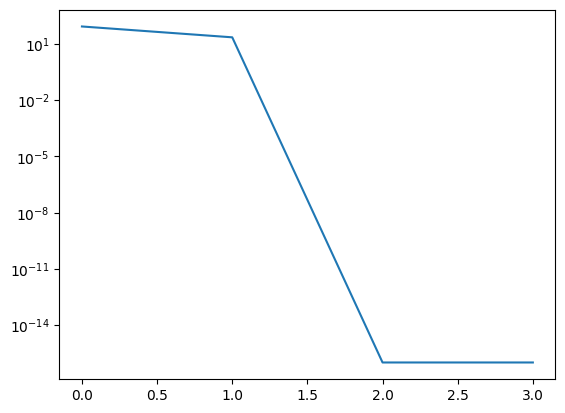

In [ ]:
plt.semilogy(fs_gd - min(fs_gd.min(), fs_hb.min(), fs_n.min()) + 1e-16, label='Gradient Descent')

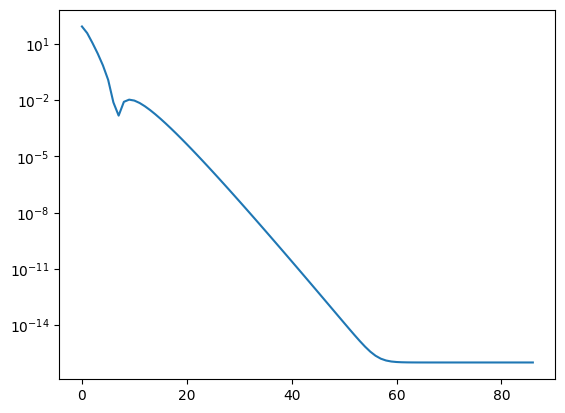

In [ ]:
plt.semilogy(fs_hb - min(fs_gd.min(), fs_hb.min(), fs_n.min()) + 1e-16, label='Heavy Ball')

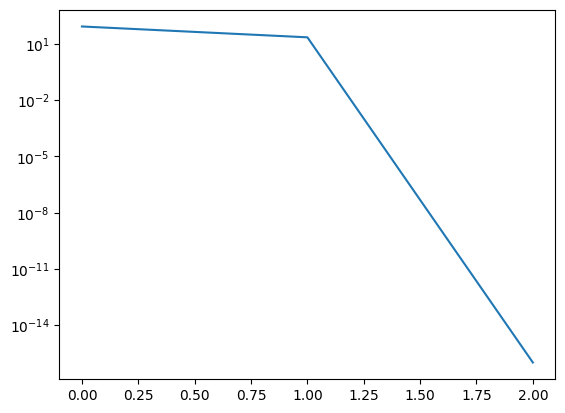

In [ ]:
plt.semilogy(fs_n - min(fs_gd.min(), fs_hb.min(), fs_n.min()) + 1e-16, label='Nesterov')
